In [7]:
%matplotlib inline

import numpy as np
from __future__ import division

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#pylab.rcParams['figure.figsize'] = 4*4, 3*4 
plt.rcParams['axes.grid'] = False
import seaborn as sns

import cv2

import logging
logger = logging.getLogger()

第二章 曲线越陡，对比度越强
=============
**编辑曲线就像是一种交易，提高某一区域的品质通常要其他区域付出代价。**

曲线调整命令路径是：图像 > 调整 > 曲线。快捷键是 Command-M。    

网格单元有 25% 和 10% 两种，可使用 Option 键单击网格进行切换。

平常使用 25%，LAB 空间使用 10% 来精准调整。

#### 2.1 左、右、上、下
默认 RGB 和 LAB 空间左黑右白，灰度和 CMYK 空间左白右黑。为了不让自己出错混淆，作者强烈建议统一上述四种空间的方向。     
作者建议使用左白右黑，这是印刷时代的标准。但我平常使用 Lightroom，为了一致，所以使用的是左黑右白的风格，和大多数数码软件匹配。

#### 2.2 曲线形状
本文谈到油墨的数值时，总是指网点面积覆盖率，即印刷品某一微小的局部被油墨覆盖的百分比。

###### 虚拟任务
将 $70^C$ 油墨调整到 $80^C$

有四种方案，如下所示：

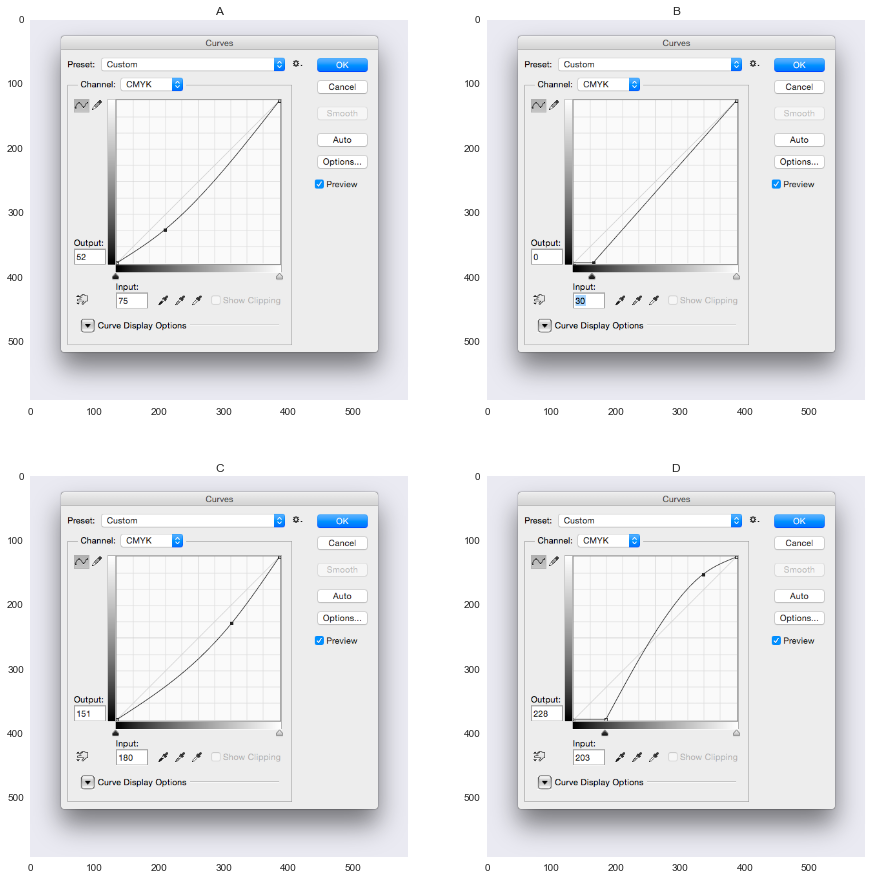

In [10]:
f, axarr = plt.subplots(2, 2, figsize=(15,15))
axarr[0,0].imshow(plt.imread('./res/70_80/A.png'))
axarr[0,0].set_title('A')

axarr[0,1].imshow(plt.imread('./res/70_80/B.png'))
axarr[0,1].set_title('B')

axarr[1,0].imshow(plt.imread('./res/70_80/C.png'))
axarr[1,0].set_title('C')

axarr[1,1].imshow(plt.imread('./res/70_80/D.png'))
axarr[1,1].set_title('D')

哪种方法更好呢？

视情况而定，     
但基本原则：但尽可能精确，清晰，简单。

### 2.3 改变曲线的角度，就是改变对比度